# Do people perform worse with a time limit? 
## We study this we study this question in great detail.
We will first run a hypothesis t-test for difference in mean score (proportion correct), 
and then we will run a t-slope test for time taken, and proportion correct

### Explaining sample size
The following is a calculator of sample size given a margin of error and standard deviations.
The standard deviation of proportion correct for those with the timed treatment was .1149091. 
The standard deviation of proportion correct for those with the untimed treatment was .03679801

> These standard deviations came from a test run.

In [110]:


# Set the desired margin of error and other parameters

get_sample_size <- function(margin_of_error, alpha=.05, sd1=.1149091, sd2=.03679801) {
    degreesoffreedomfromz <- ((sd1+sd2) /((margin_of_error/qnorm(1-alpha/2))^2)) - 1

    final_size <- ceiling((sd1+sd2)/((margin_of_error/qt(1-alpha/2,degreesoffreedomfromz))^2))
    return (final_size)
}

get_sample_size(.1)

[1] 61

This means that I need 61 trials for each treatments, totalling to 122.

In [111]:
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

First, we will import our dataset

In [112]:
data <- read.csv("data.csv", quote="")
dim(data)

[1] 137   6

we also have outliers, so we also have a separate dataset, where we filtered those out.

In [113]:
data_no_outliers <- read.csv("datanooutliers.csv", quote="")
dim(data_no_outliers)

[1] 132   6

Then, lets split into our two treatments:

In [114]:
timed <- subset(data, treatment == "timed")
untimed <- subset(data, treatment == "untimed")

timed_no <- subset(data_no_outliers, treatment == "timed")
untimed_no <- subset(data_no_outliers, treatment == "untimed") 

In [115]:
summary(timed["proportion"])
summary(untimed["proportion"])

   proportion     
 Min.   :0.06667  
 1st Qu.:0.93333  
 Median :0.96721  
 Mean   :0.91859  
 3rd Qu.:0.98571  
 Max.   :1.00000  

   proportion    
 Min.   :0.2639  
 1st Qu.:0.9467  
 Median :0.9733  
 Mean   :0.9504  
 3rd Qu.:1.0000  
 Max.   :1.0000  

### Difference in mean score

Lets check conditions yeah?
### CONDITIONS
1. independently chosen samples
2. Each sample is random
3. each sample is less than 10% of the population.
4. Both histograms are unimodal and symmetric OR large sample sizes

In [116]:
nrow(untimed)
nrow(timed)

[1] 73

[1] 61

In [117]:
nrow(untimed_no)
nrow(timed_no)

[1] 72

[1] 59

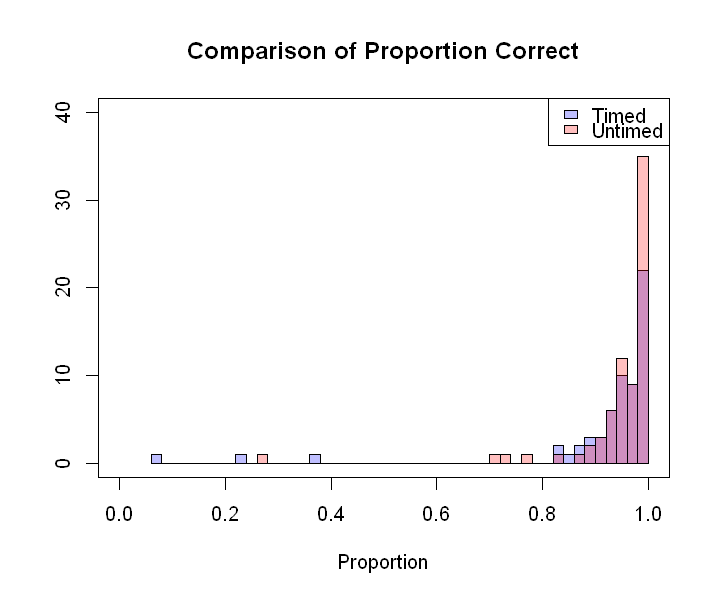

In [118]:
set_plot_dimensions(6, 5)
plot(1, type = "n", xlim = c(0, 1), ylim = c(0, 40), ylab = "", xlab = "Proportion",
     main = "Comparison of Proportion Correct")

# axis(side=1, at=seq(0, 1, by=.01))


hist(timed$proportion, xlim = c(0, 1), ylim = c(0, 10), col = rgb(0,0,1,1/4), add = TRUE, breaks = 50)
hist(untimed$proportion, xlim = c(0, 1), ylim = c(0, 10), col = rgb(1,0,0,1/4), add = TRUE, breaks = 50)


# Create a vector of labels for the legend
labels <- c("Timed", "Untimed")

#same for the colors
colors <- c(rgb(0,0,1,1/4), rgb(1,0,0,1/4))

# Add legend
legend("topright", legend = labels, fill = colors)


In [119]:
result <- t.test(untimed["proportion"], timed["proportion"], alternative= "two.sided", conf.level=.95)

# Print the results
print(result)


	Welch Two Sample t-test

data:  untimed["proportion"] and timed["proportion"]
t = 1.3059, df = 94.05, p-value = 0.1948
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01652737  0.08004649
sample estimates:
mean of x mean of y 
0.9503531 0.9185935 



### Difference in mean score but without outliers

In [120]:
result_no <- t.test(untimed_no["proportion"], timed_no["proportion"], "two.sided", conf.level=.95)

# Print the results
print(result_no)


	Welch Two Sample t-test

data:  untimed_no["proportion"] and timed_no["proportion"]
t = 1.1597, df = 96.529, p-value = 0.249
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01092293  0.04162846
sample estimates:
mean of x mean of y 
0.9598873 0.9445345 



### T-slope test
For those who took th test untimed, is there a relationship with the time they took, and the proportion they got correct?

### Checking conditions.
1. Association is Linear (kinda)
2. sample < 10% of population (yes, it should be)
3. histogram of residuals is approx normal Observe.
4. Residuals plot has equal variablilty (sure)


This looks pretty linear:

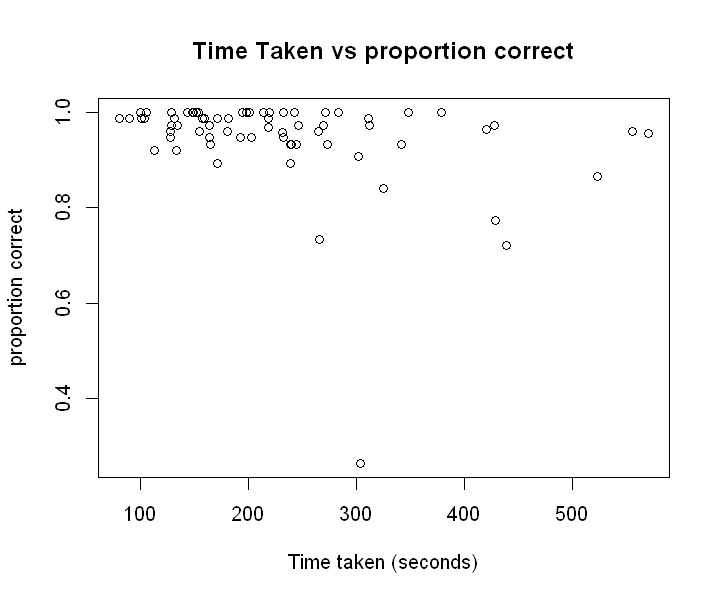

In [121]:
plot(untimed$et, untimed$proportion, main = "Time Taken vs proportion correct", xlab = "Time taken (seconds)", ylab = "proportion correct")

Starting with the histogram, we can see its approx normal

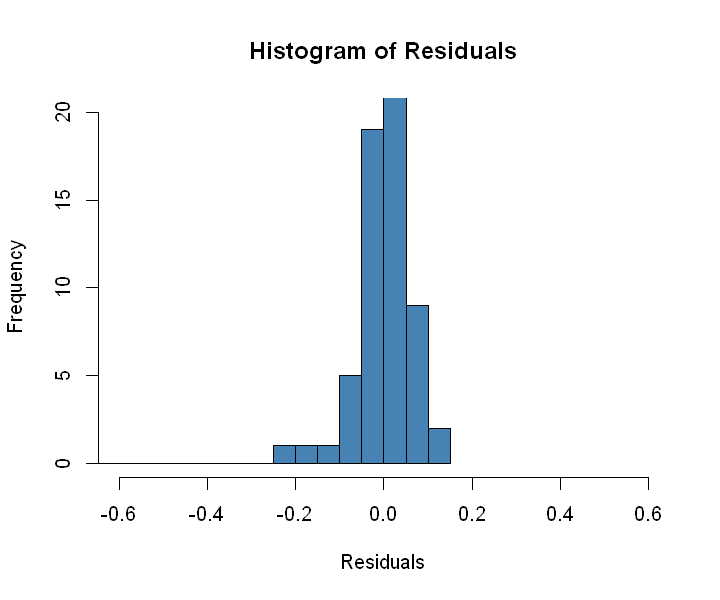

In [122]:
model <- lm(proportion~et, data = untimed)
residuals <- residuals(model)
set_plot_dimensions(6, 5)

# Create a histogram of the residuals
hist(residuals, col = "steelblue",xlim = c(-.6, .6), ylim = c(0, 20), main = "Histogram of Residuals", xlab = "Residuals", breaks=20)

We can satisfy the 10% condition by looking at our sample size: 45. Its definitely less than 10%

In [123]:
nrow(untimed)

[1] 73

Now for homoscedasticity: If this isnt homoscedastic, I dont know what is bro.

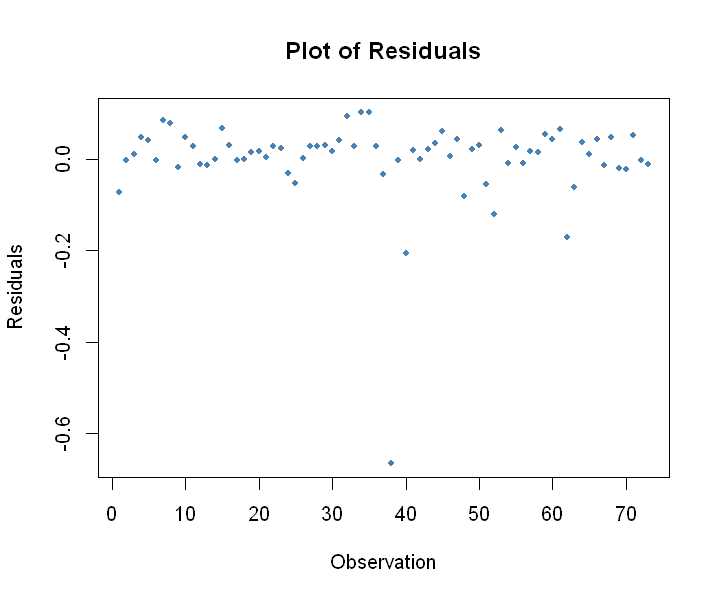

In [124]:
plot(residuals, type = "p", pch = 20, col = "steelblue",
     main = "Plot of Residuals", xlab = "Observation", ylab = "Residuals")

R has no t-slope test built in, but we can get the values doing basic linear regression

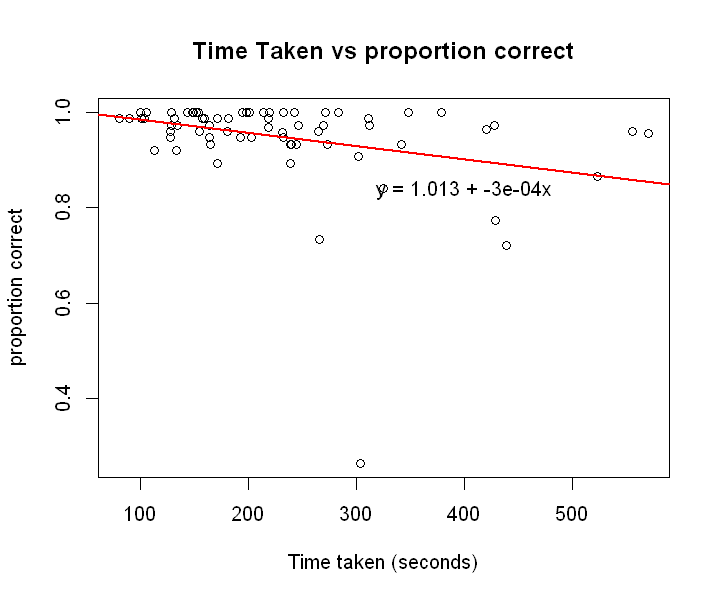

In [125]:
plot(untimed$et, untimed$proportion, main = "Time Taken vs proportion correct", xlab = "Time taken (seconds)", ylab = "proportion correct")
abline(model, col = "red", lwd = 2)
eq <- paste0("y = ", round(coef(model)[1], 4), " + ", round(coef(model)[2], 4), "x")
text(400, .8, eq, pos = 3, offset = 0.5)

In [126]:
summary(model)


Call:
lm(formula = proportion ~ et, data = untimed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66478 -0.01004  0.01697  0.04107  0.10168 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.0130498  0.0259423  39.050   <2e-16 ***
et          -0.0002776  0.0001036  -2.678   0.0092 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09546 on 71 degrees of freedom
Multiple R-squared:  0.09173,	Adjusted R-squared:  0.07894 
F-statistic: 7.171 on 1 and 71 DF,  p-value: 0.009198


Our t-stat slope statistic can be found here:

In [127]:
print(paste("T-Statistic",coef(summary(model))["et", "t value"]))
print(paste("P-Val",coef(summary(model))["et", "Pr(>|t|)"]))

[1] "T-Statistic -2.67786267933282"
[1] "P-Val 0.00919816714206645"


### T slope test without outliers

### Checking conditions.
1. Association is Linear (kinda)
2. sample < 10% of population (yes, it should be)
3. histogram of residuals is approx normal Observe.
4. Residuals plot has equal variablilty (sure)


This looks pretty linear:

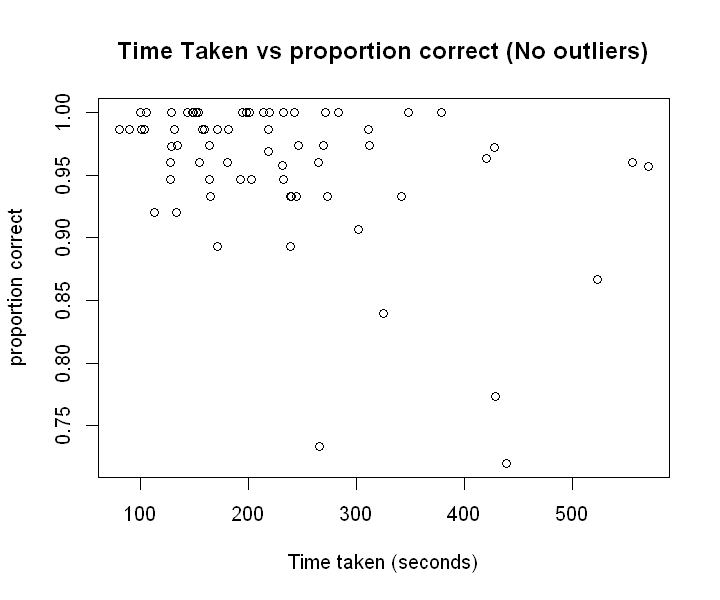

In [128]:
plot(untimed_no$et, untimed_no$proportion, main = "Time Taken vs proportion correct (No outliers)", xlab = "Time taken (seconds)", ylab = "proportion correct")

So lets, begin. First, the residual histogram is approx normal

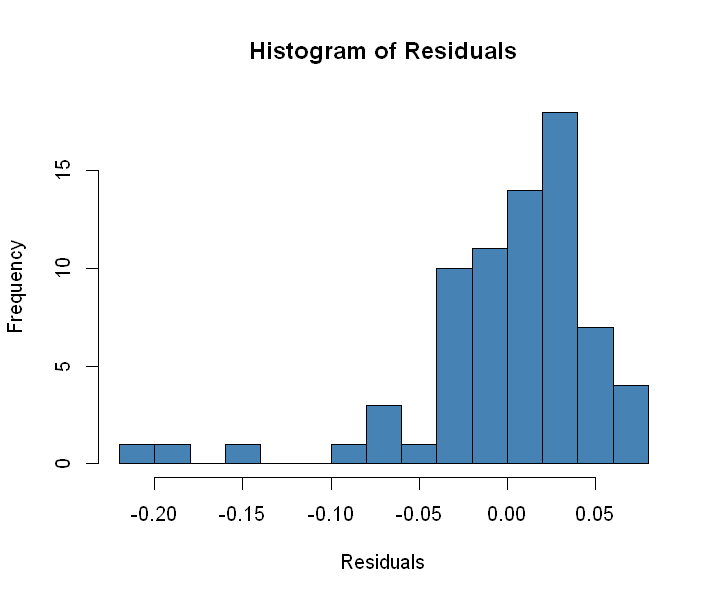

In [129]:
model_no <- lm(proportion~et, data = untimed_no)
residuals_no <- residuals(model_no)
set_plot_dimensions(6, 5)

# Create a histogram of the residuals
hist(residuals_no, col = "steelblue", main = "Histogram of Residuals", xlab = "Residuals", breaks=20)

By looking at the sample (removed outliers) 44 is definitely less than 10% of highschoolers.

In [130]:
nrow(untimed_no)

[1] 72

And by looking at the residuals plot, it seemds to be homoscedastic.

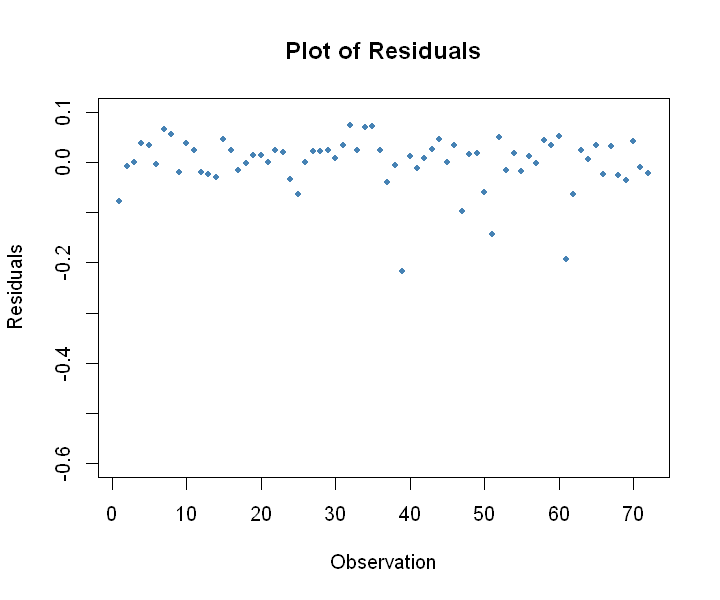

In [131]:
plot(residuals_no, type = "p", pch = 20, col = "steelblue", ylim=c(-.6, .1),
     main = "Plot of Residuals", xlab = "Observation", ylab = "Residuals")

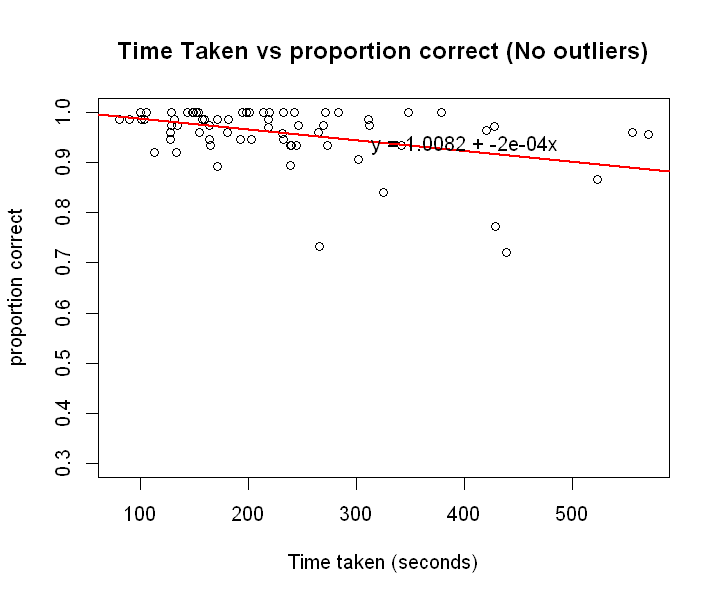

In [135]:
model_no <- lm(proportion~et, data = untimed_no)
plot(untimed_no$et, untimed_no$proportion, ylim=c(.3,1), main = "Time Taken vs proportion correct (No outliers)", xlab = "Time taken (seconds)", ylab = "proportion correct")
abline(model_no, col = "red", lwd = 2)
eq <- paste0("y = ", round(coef(model_no)[1], 4), " + ", round(coef(model_no)[2], 4), "x")
text(400, .9, eq, pos = 3, offset = 0.5)


In [133]:
summary(model_no)
print(paste("T-Statistic",coef(summary(model_no))["et", "t value"]))
print(paste("P-Val",coef(summary(model_no))["et", "Pr(>|t|)"]))


Call:
lm(formula = proportion ~ et, data = untimed_no)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21770 -0.01845  0.01263  0.03257  0.07327 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.008e+00  1.437e-02  70.150  < 2e-16 ***
et          -2.150e-04  5.761e-05  -3.732 0.000382 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05287 on 70 degrees of freedom
Multiple R-squared:  0.166,	Adjusted R-squared:  0.1541 
F-statistic: 13.93 on 1 and 70 DF,  p-value: 0.0003825


[1] "T-Statistic -3.73243147517456"
[1] "P-Val 0.00038246485681516"
